Produce Light Curve for every star

In [2]:
from common import * 

/Users/thomas/.brite


In [3]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 15, 'xtick.labelsize': 'small', 'ytick.labelsize': 'small','ytick.direction': 'in', 'xtick.direction': 'in',  # tells matplotlib to plot the ticks inward
                     'ytick.right': True, 'xtick.top': True, # tells matplotlib to plot the ticks also on the right and on the top
                     'xtick.minor.visible': True,'ytick.minor.visible': True, # include minor ticks as well
                     'xtick.major.width': 2, 'ytick.major.width': 2 # widht of major ticks
					 , 'ytick.minor.width': 1.25, 'xtick.minor.width': 1.25,})

In [4]:
config_dict = get_config()
default_result_entry = 'all'


In [7]:
def color(path):
    if 'BAb' in path or 'BLb' in path:
        return 'royalblue'
    elif 'BHr' in path or 'UBr' in path or 'BTr' in path:
        return 'firebrick'
    else:
        raise NameError('No Satellite Name in Path: ' + path)



def create_plot(path):
    name = path.split('/')[-1]
    data_path = os.path.join(config_dict['Decorrelation Path'],path)
    try:
        data = Data(path,None)
    except:
        return
    mosaic = """
            AABCD
            AABED
            """
    fig = plt.figure(constrained_layout=True,figsize = (15,5),dpi = 100)
    axes = fig.subplot_mosaic(mosaic)
    lk = data._lk_obj
    do_ave = True
    try:
        ave_lk = data._ave_lk_obj
    except OS_Error:
        do_ave = False
    
    if ave_lk is None:
        do_ave = False
    
    
    zoom_in = lk[abs(lk.time.value - np.mean(lk.time.value)) <= 5]
    zoom_in_2 = lk[abs(lk.time.value - np.mean(lk.time.value) - 10) <= 5]
    if len(zoom_in_2.time.value) > len(zoom_in.time.value):
        zoom_in = zoom_in_2
    zoom_in_3 = lk[abs(lk.time.value - np.mean(lk.time.value) + 10) <= 5]
    if len(zoom_in_3.time.value) > len(zoom_in.time.value):
        zoom_in = zoom_in_3
    
    
    c = color(name)
    
    axes["A"].plot(lk.time.value, lk.flux.value, 'ko', ms = 0.5, alpha = 0.5)
    axes["A"].axvline(zoom_in.time.value[0], color = 'silver', lw = 1, ls = '--', zorder = 5)
    axes["A"].axvline(zoom_in.time.value[-1], color = 'silver', lw = 1, ls = '--', zorder = 5)
    axes["B"].plot(zoom_in.time.value, zoom_in.flux.value, 'ko', ms = 0.5, alpha = 0.5)
    
    if do_ave:
        ave_zoom_in = ave_lk[abs(ave_lk.time.value - zoom_in.time.value[0] - 5) <= 5]
        axes["B"].plot(ave_zoom_in.time.value, ave_zoom_in.flux.value,  color = c, ls = '', marker = 'o',  ms = 1.5, alpha = 0.75)
        axes["A"].plot(ave_lk.time.value, ave_lk.flux.value,  color = c, ls = '', marker = 'o', ms = 1.5, alpha = 0.75)
    
    pdg = data.to_periodogram(minimum_frequency = 0.1, maximum_frequency = 100)
    period = pdg.period_at_max_power.value
    period2 = 2*period
    print(period)
    

    
    
    axes["C"].plot((lk.time.value%period)/period, lk.flux.value, 'ko', ms = 0.5, alpha = 0.5)
    axes["C"].plot((lk.time.value%period)/period + 1, lk.flux.value, 'ko', ms = 0.5, alpha = 0.5)
    axes["E"].plot((lk.time.value%period2)/period2, lk.flux.value, 'ko', ms = 0.5, alpha = 0.5)
    axes["E"].plot((lk.time.value%period2)/period2 + 1, lk.flux.value, 'ko', ms = 0.5, alpha = 0.5)
    axes["D"].axvline(1/period, color = c, lw = 2, ls = '-')
    axes["D"].axvline(1/period2, color = c, lw = 2, ls = '--')
    axes["D"].plot(pdg.frequency, pdg.power, 'k-', lw = 1)
    
    
    if do_ave:
        axes["C"].plot((ave_lk.time.value%period)/period, ave_lk.flux.value, color = c, ls = '', marker = 'o', ms = 1.5, alpha = 0.75)
        axes["C"].plot((ave_lk.time.value%period)/period + 1, ave_lk.flux.value, color = c, ls = '', marker = 'o', ms = 1.5, alpha = 0.75)
        axes["E"].plot((ave_lk.time.value%period2)/period2, ave_lk.flux.value,  color = c, ls = '', marker = 'o', ms = 1.5, alpha = 0.75)
        axes["E"].plot((ave_lk.time.value%period2)/period2 + 1, ave_lk.flux.value, color = c, ls = '', marker = 'o', ms = 1.5, alpha = 0.75)
    
    axes["D"].set_xlim(0, np.max([10, 2/period]))
    axes["B"].set_yticklabels([])
    x1 = np.round(zoom_in.time.value[0] + 2, 0)
    x3 = np.round(zoom_in.time.value[0] + 8, 0)
    x2 = np.round((x1 + x3)/2, 0)
    axes["B"].set_xticks([x1, x2, x3])
    axes["C"].set_yticklabels([])
    axes["E"].set_yticklabels([])
    axes['D'].yaxis.tick_right()
    axes['D'].yaxis.set_label_position('right')
    axes['C'].xaxis.set_label_position('top') 
    axes["A"].invert_yaxis()
    axes["B"].invert_yaxis()
    axes["C"].invert_yaxis()
    axes["E"].invert_yaxis()
    axes["A"].set_xlabel("time (days)")
    axes["B"].set_xlabel("time (days)")
    axes["C"].set_xlabel("phase P={:3f}d".format(period))
    axes["E"].set_xlabel("phase P={:3f}d".format(period2))
    axes["D"].set_xlabel("frequency ($d^{-1}$)")
    axes["A"].set_ylabel("Magnitude")
    axes["D"].set_ylabel("Power")
    axes["D"].set_title("f={:3f} ".format(1/period) + '$d^{-1}$')
    ylim = axes["A"].get_ylim()
    axes["B"].set_ylim(ylim)
    axes["C"].set_ylim(ylim)
    axes["E"].set_ylim(ylim)
    fig.suptitle(name)
    plt.tight_layout()
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.savefig(f"../LC_overview_plot/{name}.png", facecolor = "white")
    
    

Numbers of stars done: 32


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 3300 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 102 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 62856 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1555 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 8325 of "dub

No ave file found for HD56014_12-CMaPup-I-2015_BLb_5_4_A_part1.ndat


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 32827 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 429 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 10379 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 327 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 56484 of "du

No ave file found for HD56014_12-CMaPup-I-2015_BLb_5_4_A_part2.ndat


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 16600 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 268 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 43894 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1246 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 2362 of "du

No ave file found for HD56014_12-CMaPup-I-2015_BHr_4_4_A_part1.ndat


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 22469 of "dubious year (Note 3)"
  ErfaWarning)


No ave file found for HD56014_12-CMaPup-I-2015_BHr_4_4_A_part2.ndat
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/Decorrelations/Field 12/HD_56014/21-07-2021_SPP/RESULTS/BLb/HD56014_12-CMaPup-I-2015_BTr_1_2_3_4_merged_.ndat


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 3545 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 4707 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 3736 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 121 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious

1.2626694669821932


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/ipykernel_launcher.py:107: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/Decorrelations/Field 12/HD_56014/21-07-2021_SPP/RESULTS/BLb/HD56014_12-CMaPup-I-2015_BHr_3_4_4_4_merged_.ndat


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 56484 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 267 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 3839 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 4659 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 4055 of "dub

1.262518463503846


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/ipykernel_launcher.py:107: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/Decorrelations/Field 12/HD_56014/21-07-2021_SPP/RESULTS/BLb/HD56014_12-CMaPup-I-2015_BLb_3_4_5_5_4_merged_.ndat


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 32827 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 429 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1655 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1537 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1313 of "dub

1.2628818047557635


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/ipykernel_launcher.py:107: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 61834 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1701 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 18682 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/er

No ave file found for HD44743_12-CMaPup-I-2015_BLb_5_4_A_part2.ndat
No ave file found for HD44743_12-CMaPup-I-2015_BLb_5_4_A_part1.ndat


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 3051 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 59294 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1652 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 2372 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 41 of "dubi

/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/Decorrelations/Field 12/HD_44743/RESULTS/BLb/HD44743_12-CMaPup-I-2015_BTr_1_2_3_4_merged_.ndat


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 3452 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 4171 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 3642 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 123 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious

0.05366604464024533


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/ipykernel_launcher.py:107: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/Decorrelations/Field 12/HD_44743/RESULTS/BLb/HD44743_12-CMaPup-I-2015_BLb_4_5_5_4_merged_.ndat


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 18682 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 104 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1520 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1625 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 2299 of "dub

0.25121148966999174


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/ipykernel_launcher.py:107: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 56933 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1515 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 2156 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erf

/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/Decorrelations/Field 12/HD_50123/28-06-2021_GD/RESULTS/HD50123_12-CMaPup-I-2015_BTr_1_2_3_4_merged_.ndat


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 3572 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 3703 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 3529 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 114 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious

0.06791517227244294


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/ipykernel_launcher.py:107: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 2539 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 41 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 57385 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/

/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/Decorrelations/Field 12/HD_61068/25-06-2021_GD/RESULTS/HD61068_12-CMaPup-I-2015_BTr_1_2_3_4_merged_.ndat


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 3342 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 4504 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 3600 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 122 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious

0.1667218314637277


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/ipykernel_launcher.py:107: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 2563 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 104 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 8206 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/

No ave file found for HD44402_12-CMaPup-I-2015_BLb_5_4_A_part1.ndat
No ave file found for HD44402_12-CMaPup-I-2015_BLb_5_4_A_part2.ndat


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 16541 of "dubious year (Note 3)"
  ErfaWarning)


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/Decorrelations/Field 12/HD_44402/25-06-2021_SPP/RESULTS/HD44402_12-CMaPup-I-2015_BLb_4_5_5_4_merged_.ndat


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 2159 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 793 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 924 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 16541 of "dubious

3.887705104952749


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/ipykernel_launcher.py:107: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 15296 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 225 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 17517 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erf

/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/Decorrelations/Field 12/HD_53244/RESULTS/HD53244_12-CMaPup-I-2015_BTr_1_2_4_merged_.ndat


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 9601 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 3922 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 3994 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 126 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious

6.763575256406555


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/ipykernel_launcher.py:107: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 45094 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1371 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 17059 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/er

/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/Decorrelations/Field 12/HD_50896/30-06-2021_GD/RESULTS/HD50896_12-CMaPup-I-2015_BTr_1_2_3_4_merged_.ndat


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 3445 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 4949 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 3814 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 127 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious

0.06699400105208579


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/ipykernel_launcher.py:107: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 14492 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 13141 of "dubious year (Note 3)"
  ErfaWarning)


No ave file found for HD50877_12-CMaPup-I-2015_BHr_4_4_A_part4.ndat
No ave file found for HD50877_12-CMaPup-I-2015_BHr_4_4_A_part2.ndat


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 46524 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 7997 of "dubious year (Note 3)"
  ErfaWarning)


No ave file found for HD50877_12-CMaPup-I-2015_BHr_4_4_4_4_4.ndat
No ave file found for HD50877_12-CMaPup-I-2015_BHr_4_4_A_part3.ndat
No ave file found for HD50877_12-CMaPup-I-2015_BHr_4_4_4_4_4_merged_.ndat
No ave file found for HD50877_12-CMaPup-I-2015_BHr_4_4_A_part1.ndat
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/Decorrelations/Field 12/HD_50877/12-07-2021_SPP/RESULTS/HD50877_12-CMaPup-I-2015_BHr_4_4_4_4_4_merged_.ndat


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 10894 of "dubious year (Note 3)"
  ErfaWarning)


No ave file found for HD50877_12-CMaPup-I-2015_BHr_4_4_4_4_4_merged_.ndat
0.06779533190174554


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 4168 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 5421 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 3162 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 46524 of "dubio

/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/Decorrelations/Field 12/HD_63462/23-07-2021_GD/RESULTS/HD63462_12-CMaPup-I-2015_BLb_3_4_5_5_4_merged_.ndat


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 2566 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 2358 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 2625 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 35929 of "dubio

0.0646784617607468


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/ipykernel_launcher.py:107: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/Decorrelations/Field 12/HD_63462/23-07-2021_GD/RESULTS/HD63462_12-CMaPup-I-2015_BTr_1_2_3_4_merged_.ndat


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 62733 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1711 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 3185 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 5120 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 3565 of "du

0.06807900631356505


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/ipykernel_launcher.py:107: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/Decorrelations/Field 12/HD_63462/23-07-2021_GD/RESULTS/HD63462_12-CMaPup-I-2015_BHr_3_4_4_4_merged_.ndat


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 55318 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1518 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 3495 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 4376 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 4110 of "du

0.06759572609335307


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/ipykernel_launcher.py:107: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 41704 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1217 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 10045 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/er

/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/Decorrelations/Field 12/HD_45871/28-06-2021_GD/RESULTS/HD45871_12-CMaPup-I-2015_BTr_1_2_3_4_merged_.ndat


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 3028 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 4127 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 3644 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 115 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious

0.5405668938341828


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/ipykernel_launcher.py:107: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 43783 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 908 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 23693 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erf

/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/Decorrelations/Field 12/HD_52877/15-07-2021_GD/RESULTS/HD52877_12-CMaPup-I-2015_BHr_3_4_4_4_merged_.ndat


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 4571 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 2064 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 3844 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 43783 of "dubio

0.06731139262896522


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/ipykernel_launcher.py:107: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 10408 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 406 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 21546 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erf

/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/Decorrelations/Field 12/HD_62623/22-07-2021_GD/RESULTS/HD62623_12-CMaPup-I-2015_BHr_3_4_4_4_merged_.ndat


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 3753 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 4374 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 3853 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 214 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious

0.06730068235734714


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/ipykernel_launcher.py:107: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/Decorrelations/Field 12/HD_62623/22-07-2021_GD/RESULTS/HD62623_12-CMaPup-I-2015_BLb_4_5_5_4_merged_.ndat


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 28070 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 913 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 2632 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1786 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 2442 of "dub

0.06931662082372794


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/ipykernel_launcher.py:107: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 10860 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 405 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 2900 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa

/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/Decorrelations/Field 12/HD_52089/19-07-2021_GD/RESULTS/HD52089_12-CMaPup-I-2015_BLb_4_5_5_4_merged_.ndat


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1193 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1288 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1505 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 21839 of "dubio

0.06927141104293787


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/ipykernel_launcher.py:107: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/Decorrelations/Field 12/HD_52089/19-07-2021_GD/RESULTS/HD52089_12-CMaPup-I-2015_BHr_3_4_4_4_merged_.ndat


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 36990 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 852 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 915 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 562 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 3580 of "dubio

0.06764667253787898


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/ipykernel_launcher.py:107: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 11122 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 419 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 18978 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erf

/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/Decorrelations/Field 12/HD_53138/20-07-2021_GD/RESULTS/HD53138_12-CMaPup-I-2015_BLb_4_5_5_4_merged_.ndat


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1679 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1507 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1026 of "dubious year (Note 3)"
 

0.06922476624629237


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/ipykernel_launcher.py:107: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/Decorrelations/Field 12/HD_53138/20-07-2021_GD/RESULTS/HD53138_12-CMaPup-I-2015_BHr_3_4_4_4_merged_.ndat


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 54490 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1463 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 3835 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 4550 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 3210 of "du

0.06784118983550745


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/ipykernel_launcher.py:107: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 62857 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1562 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 9873 of "dubious year (Note 3)"
  ErfaWarning)


No ave file found for HD48917_12-CMaPup-I-2015_BLb_5_4_A_part2.ndat


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 23568 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 429 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 183 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 10381 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 329 of "dubi

No ave file found for HD48917_12-CMaPup-I-2015_BLb_5_4_A_part1.ndat


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 17385 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 288 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 42957 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1233 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 17386 of "d

/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/Decorrelations/Field 12/HD_48917/07-07-2021_SPP/RESULTS/BLb/HD48917_12-CMaPup-I-2015_BTr_1_2_3_4_merged_.ndat


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 3561 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 4192 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 3592 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 108 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious

0.07509392589729287


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/ipykernel_launcher.py:107: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/Decorrelations/Field 12/HD_48917/07-07-2021_SPP/RESULTS/BLb/HD48917_12-CMaPup-I-2015_BLb_3_4_5_5_4_merged_.ndat


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 23568 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 429 of "dubious year (Note 3)"
  ErfaWarning)


IndexError: index 0 is out of bounds for axis 0 with size 0

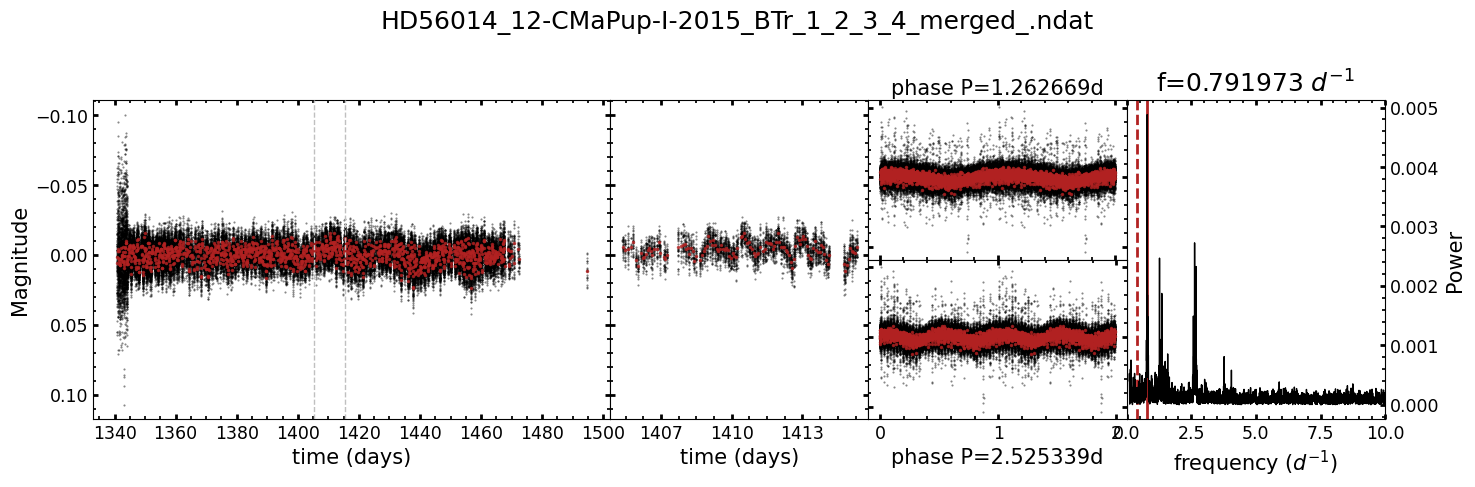

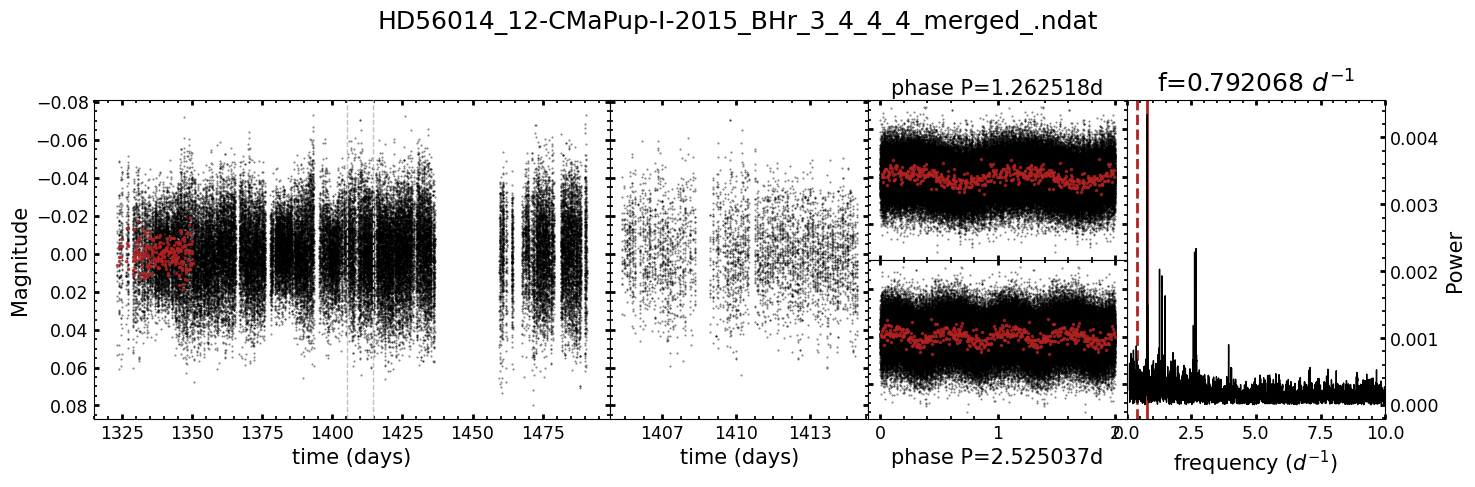

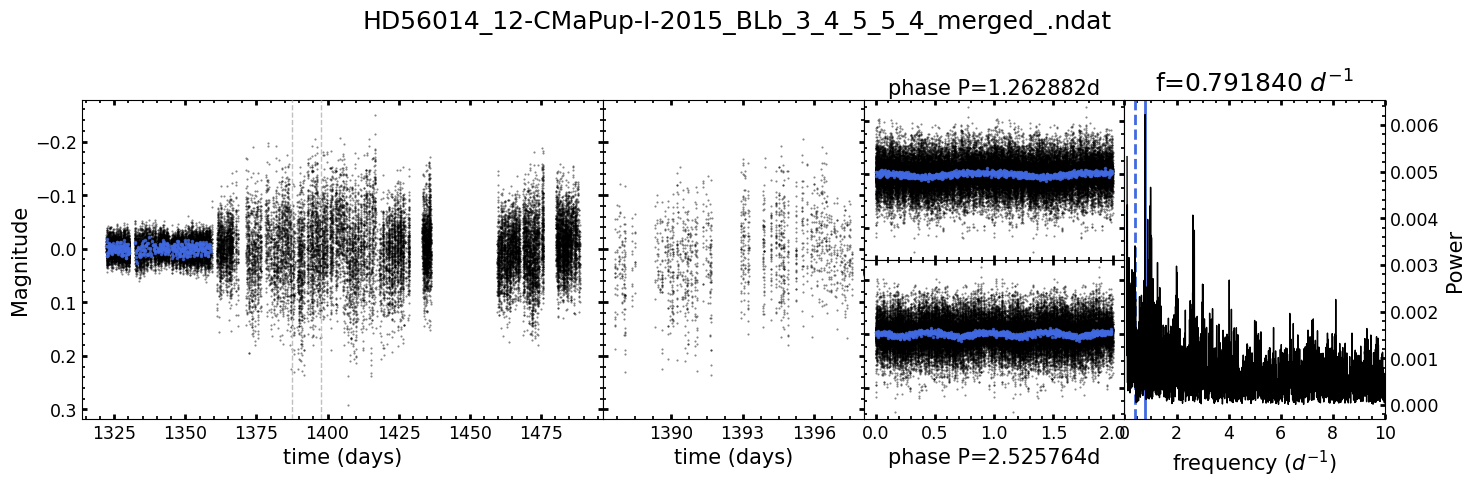

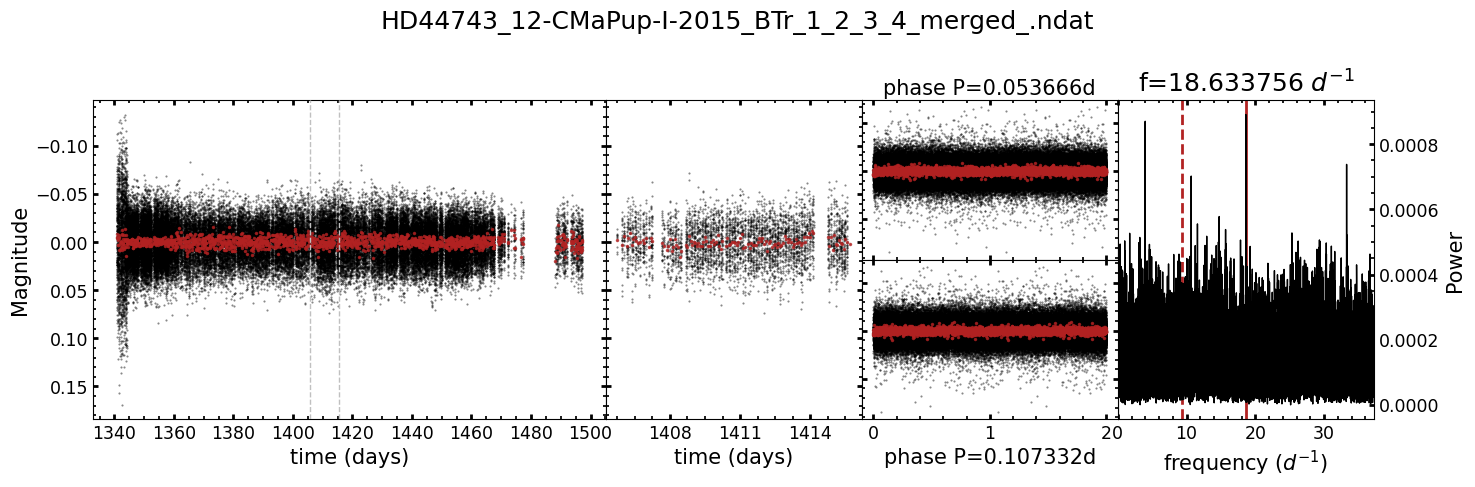

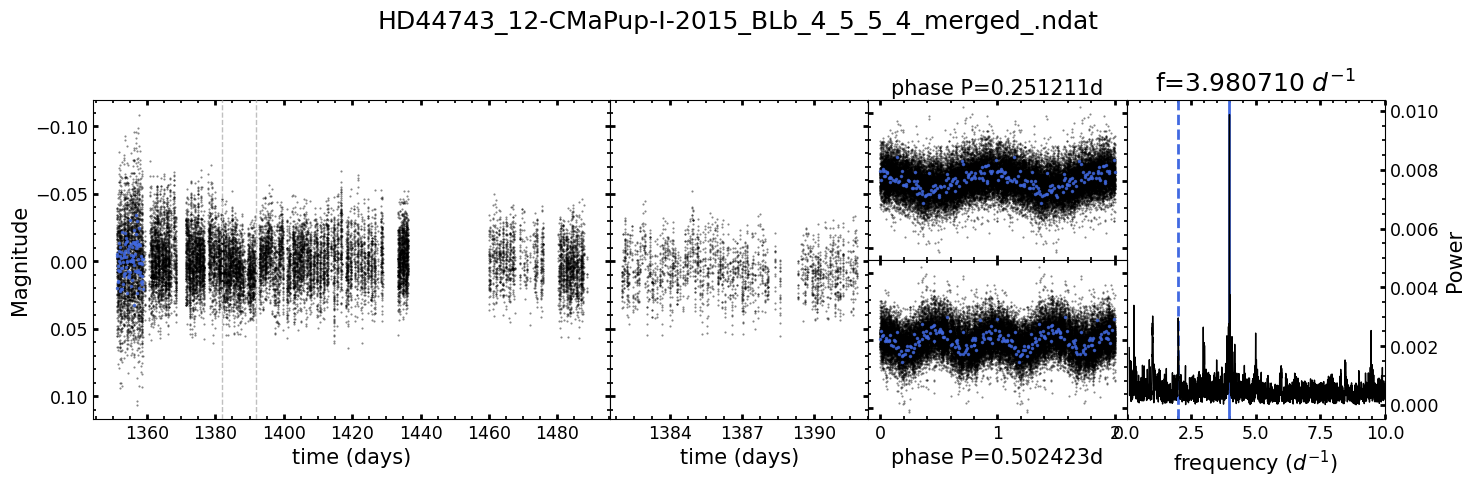

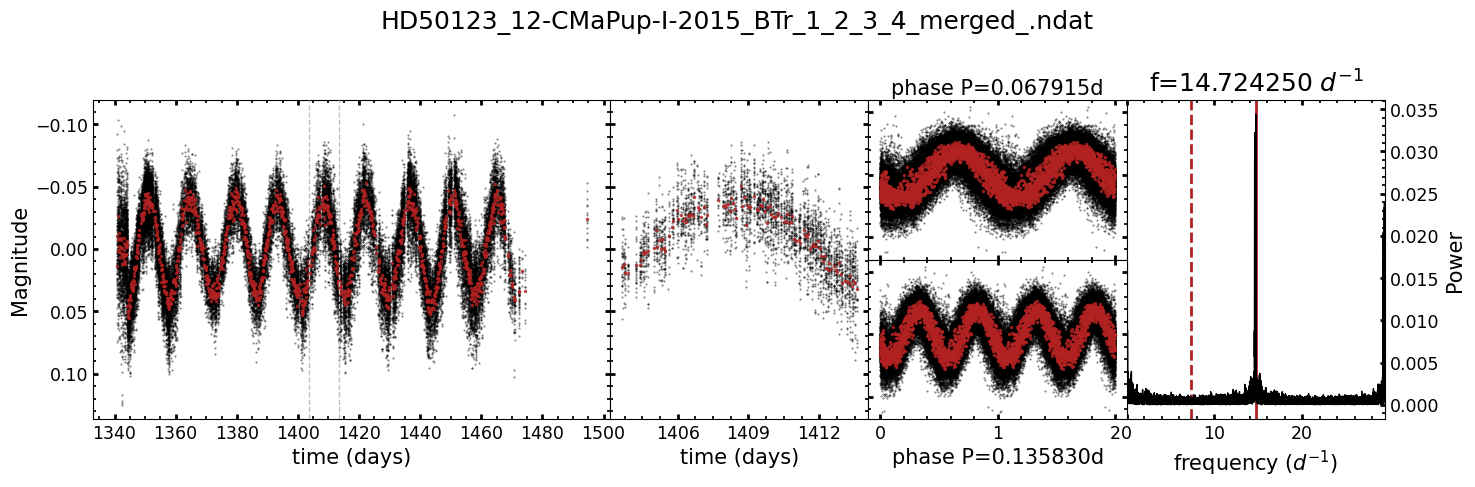

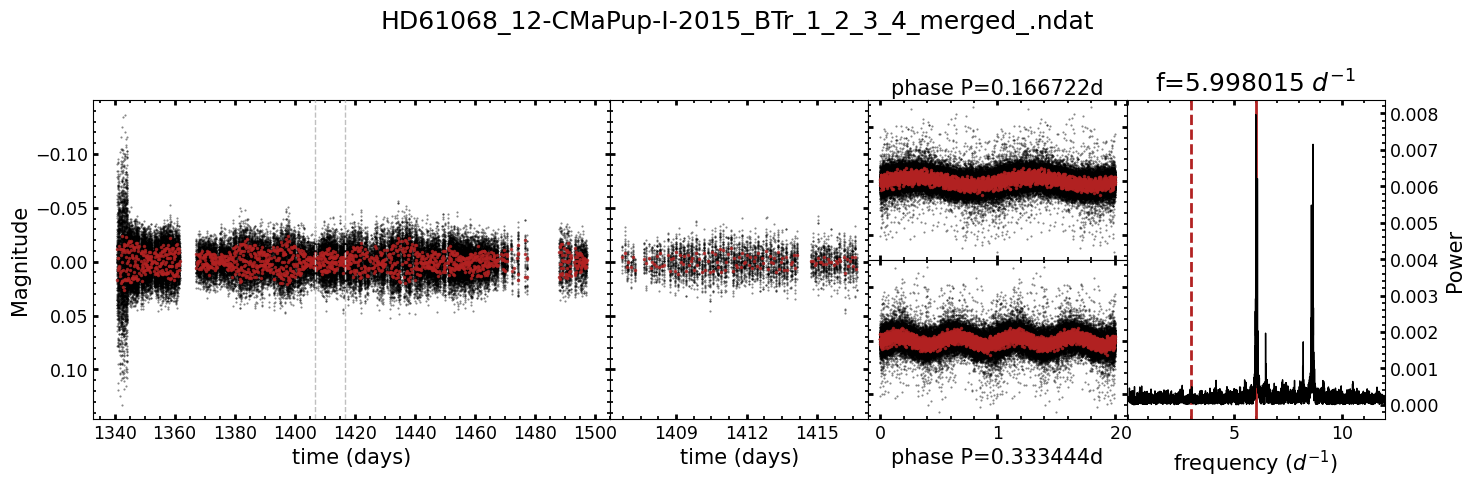

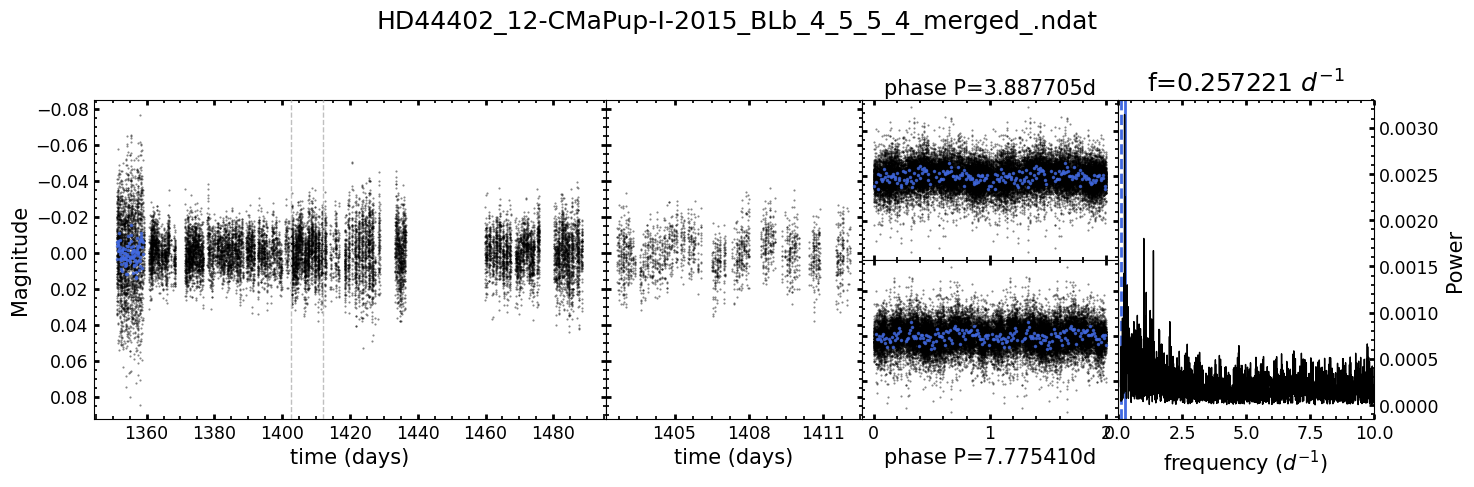

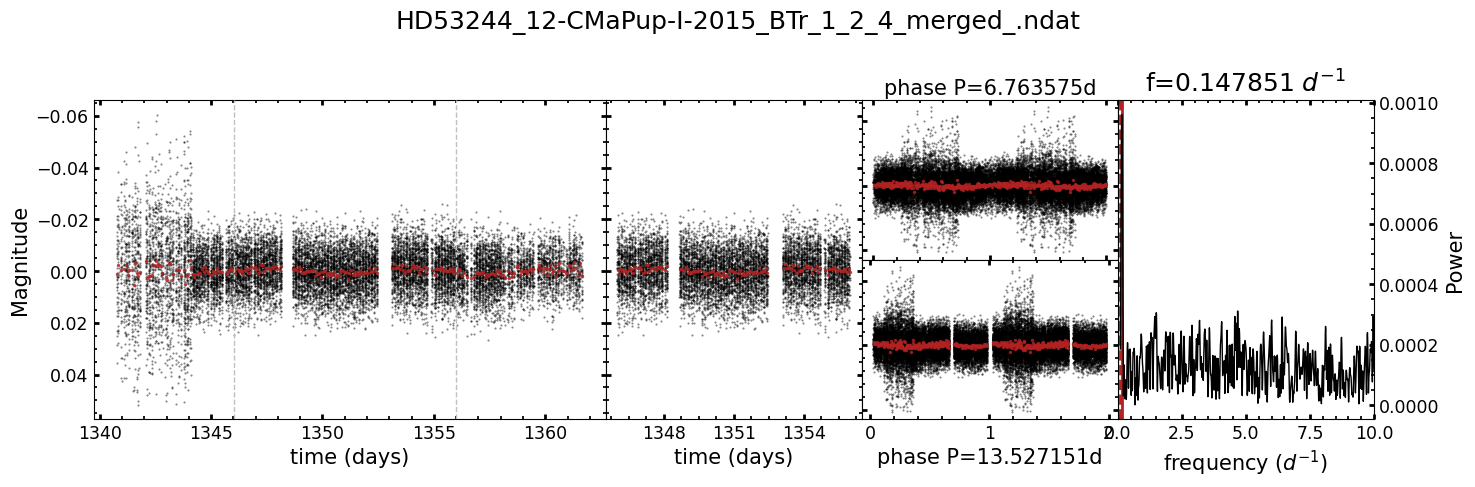

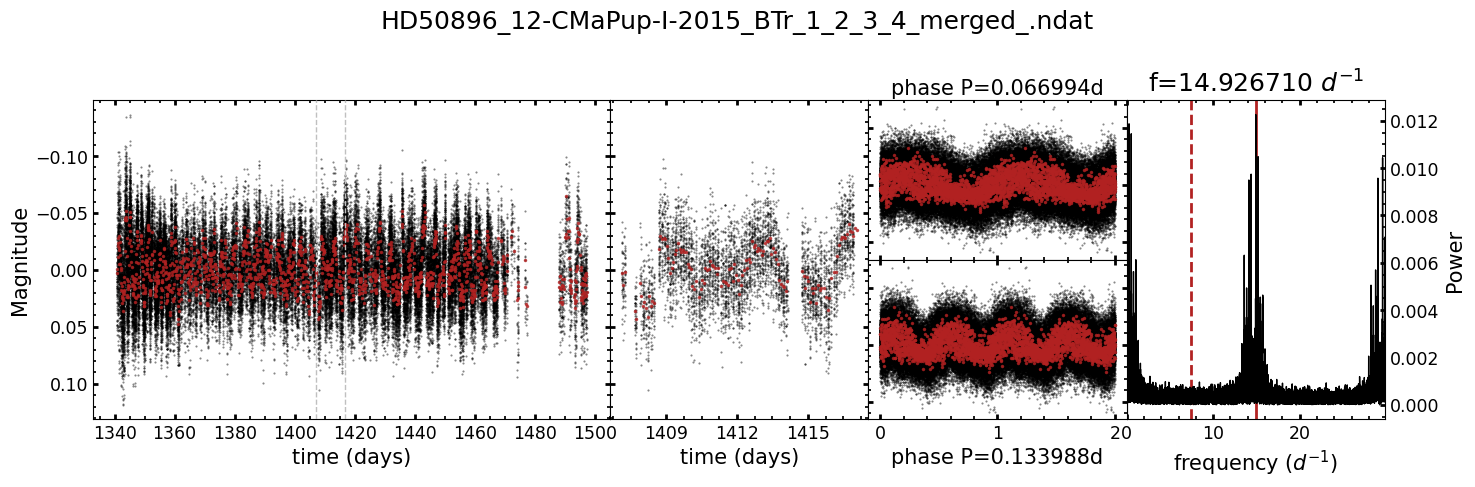

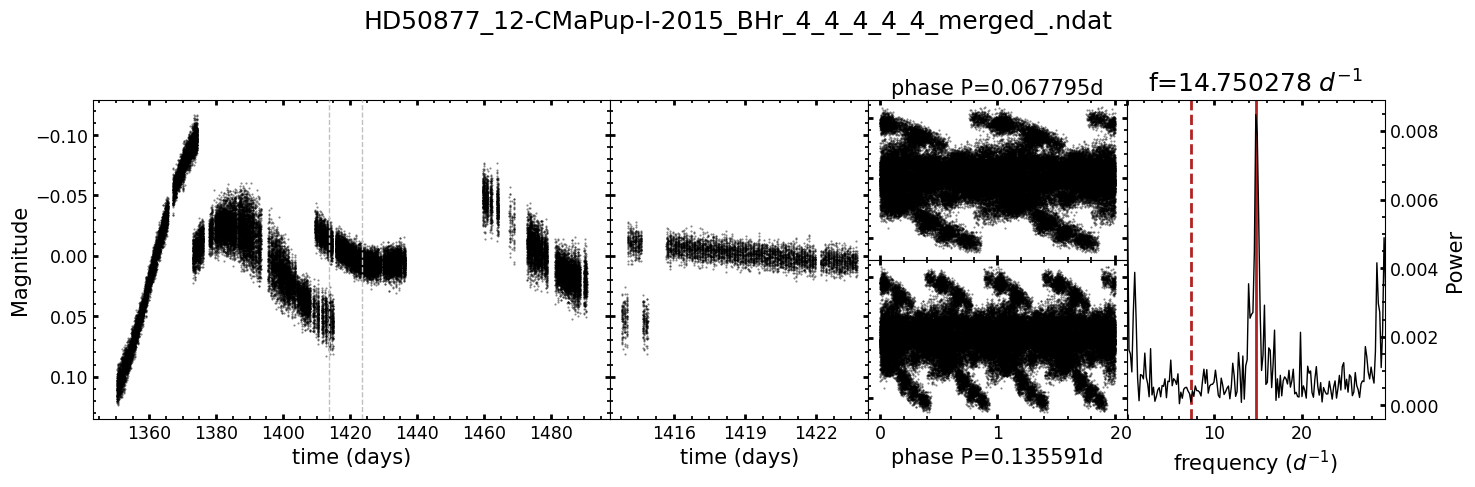

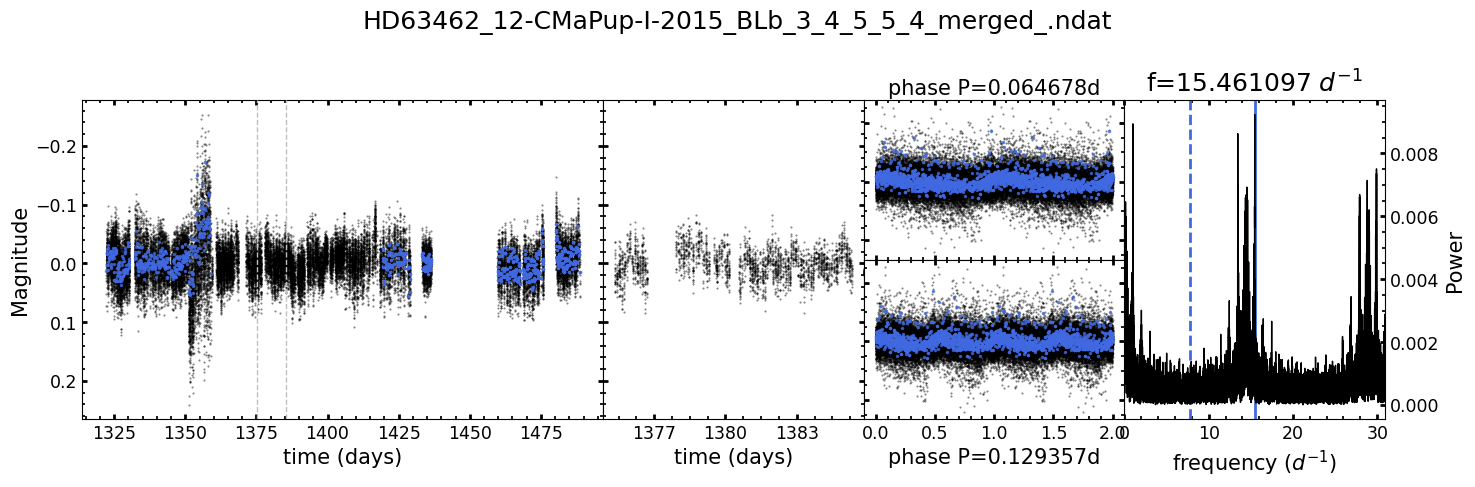

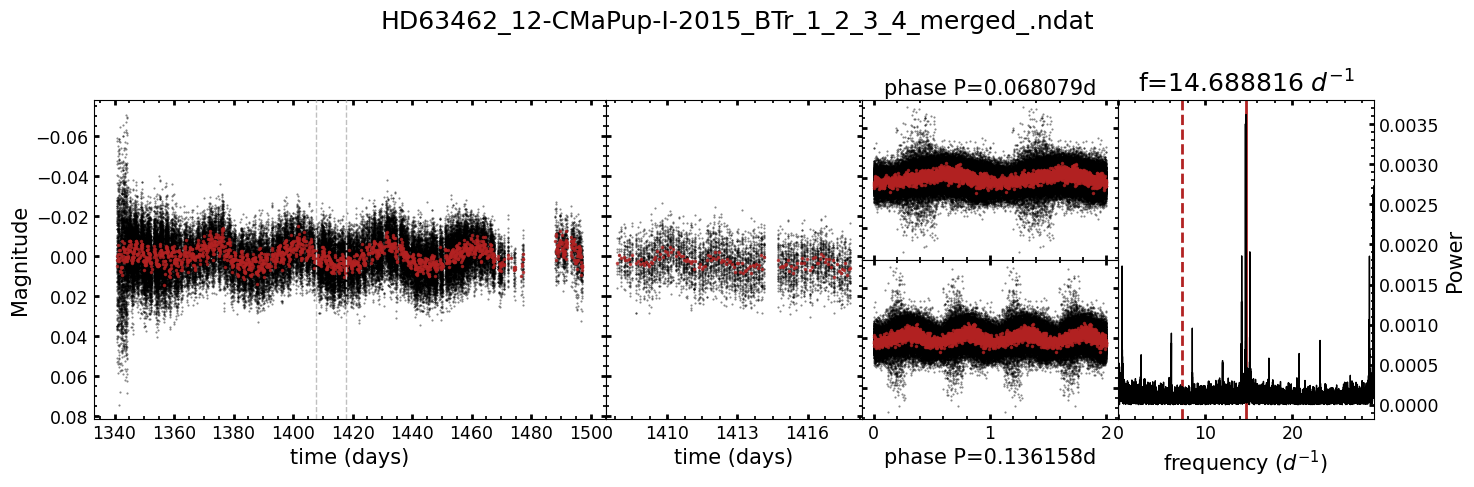

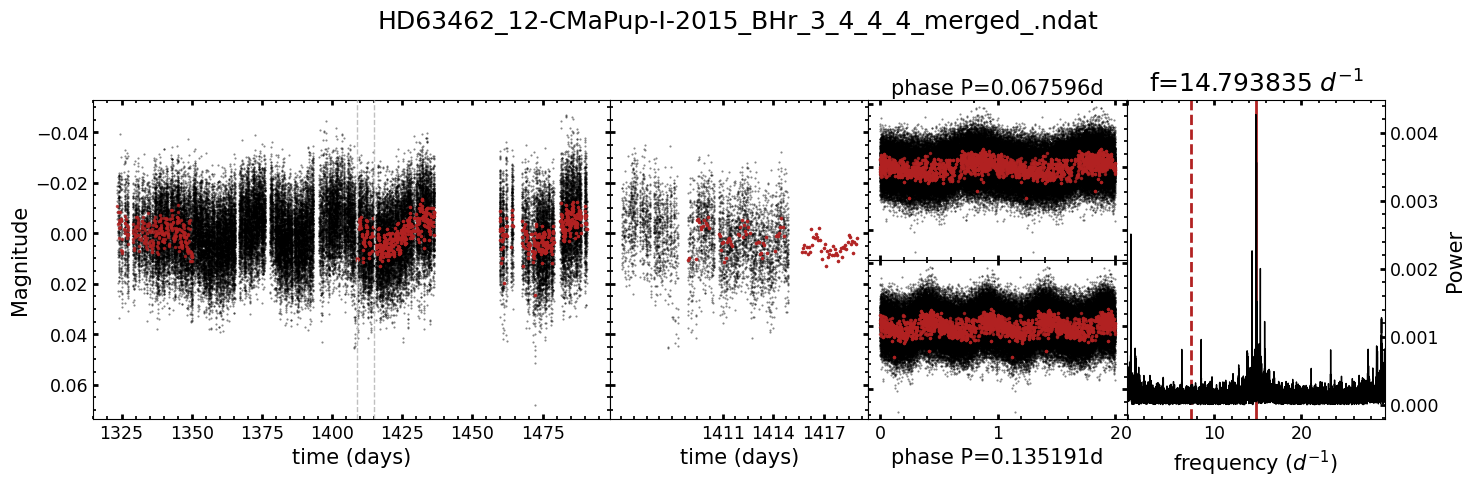

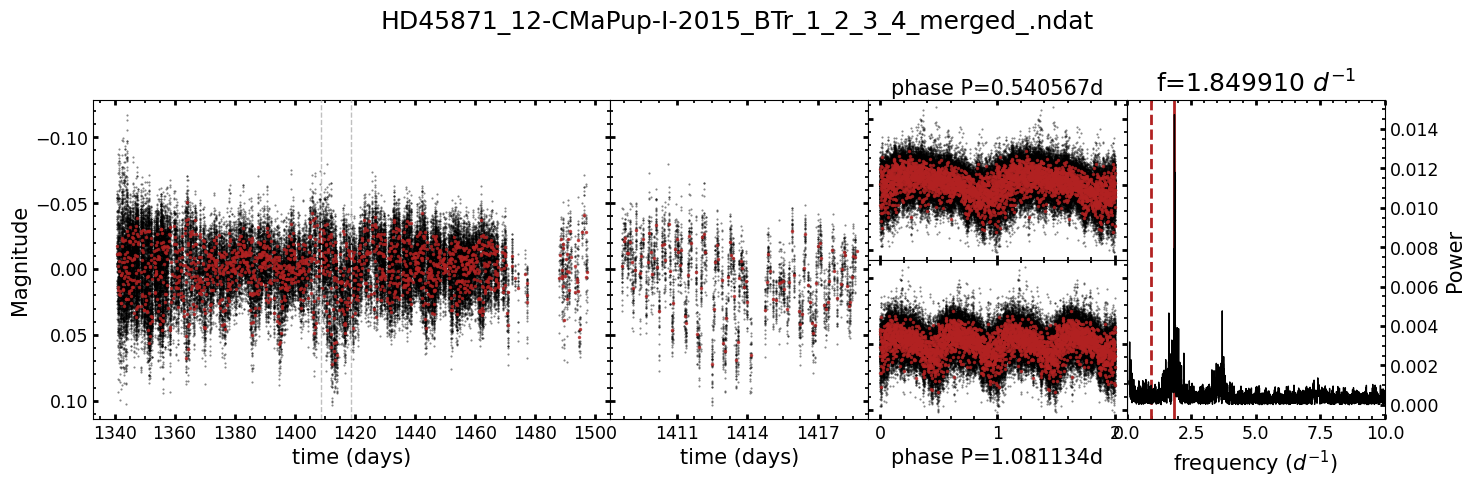

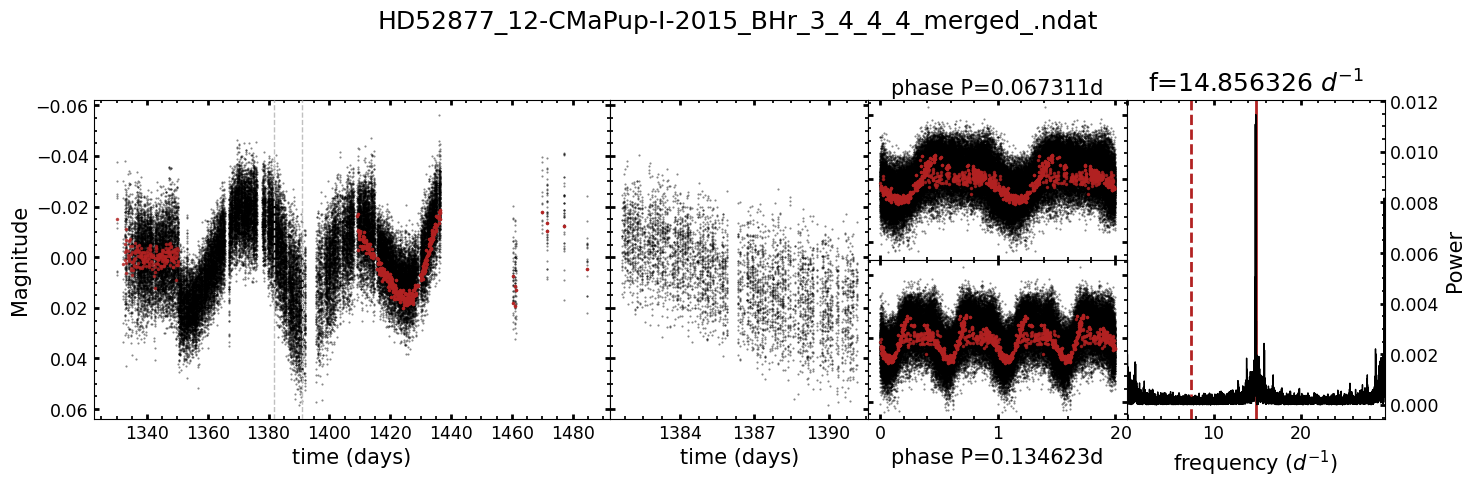

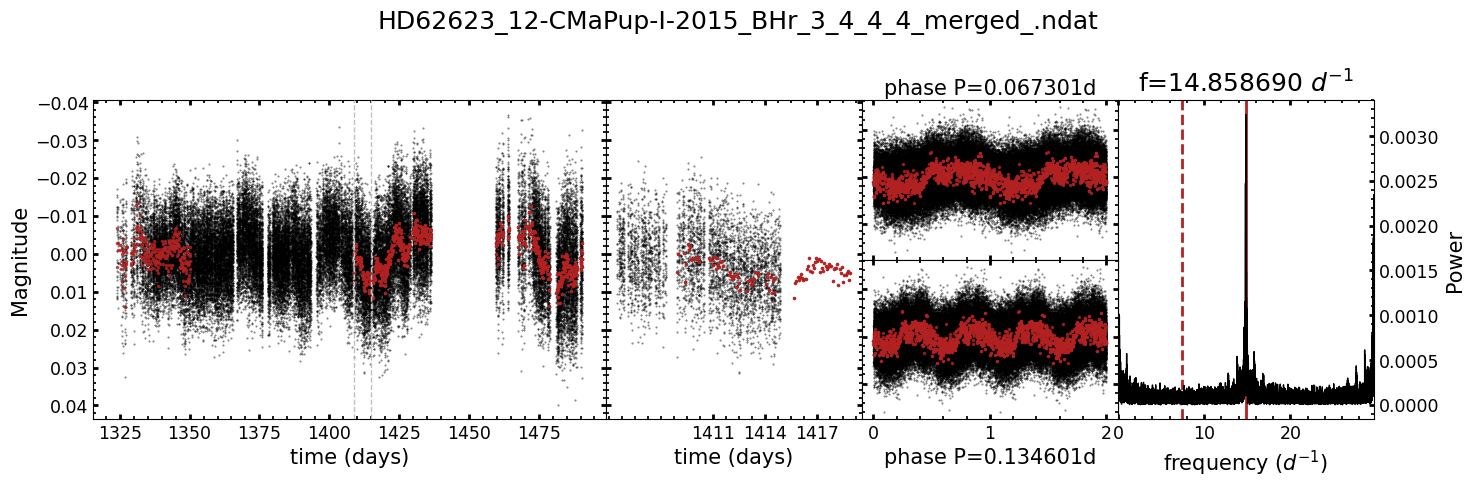

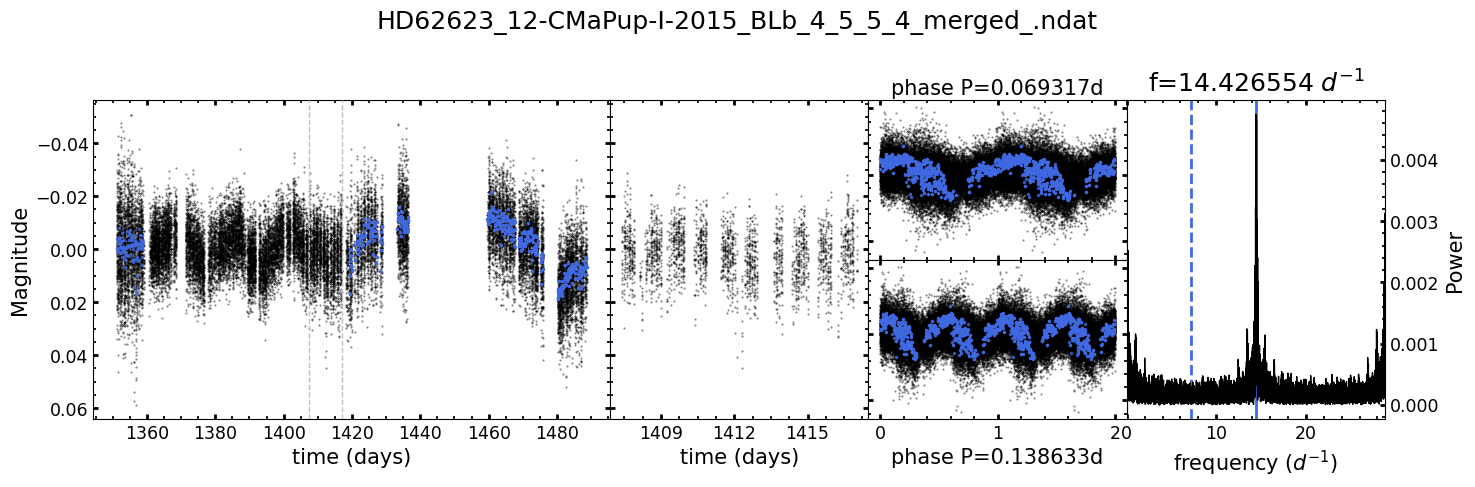

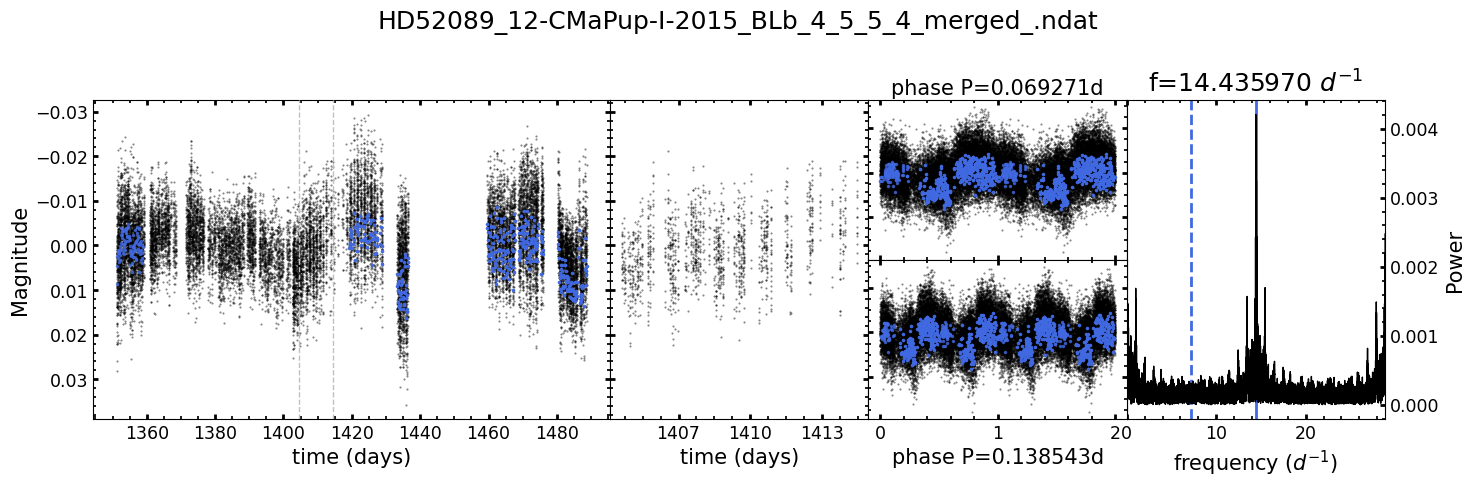

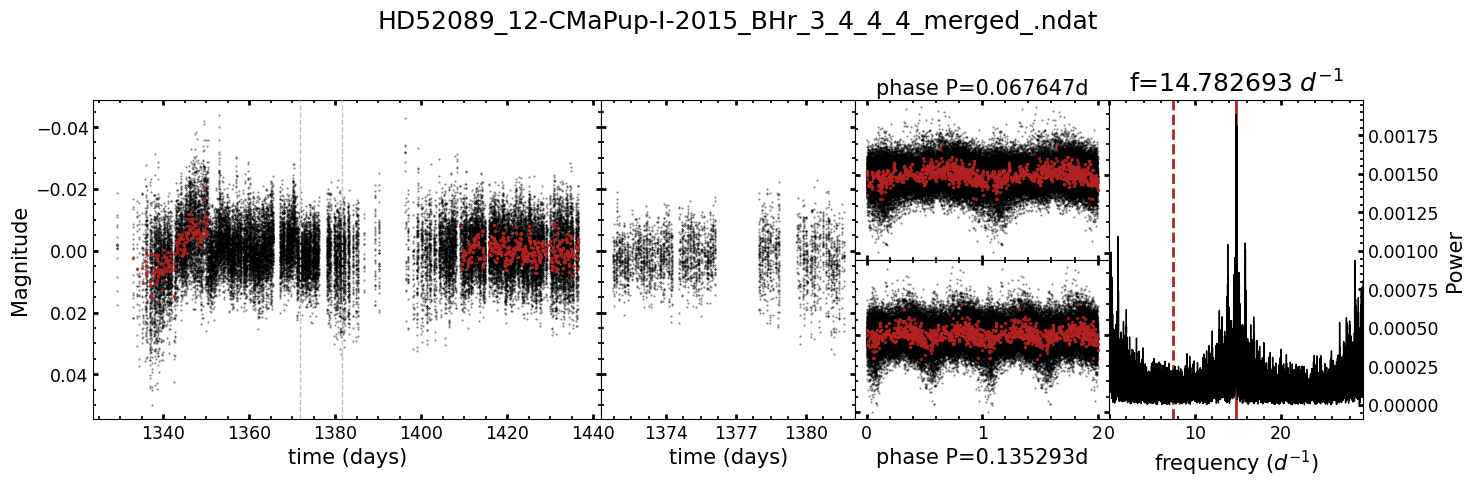

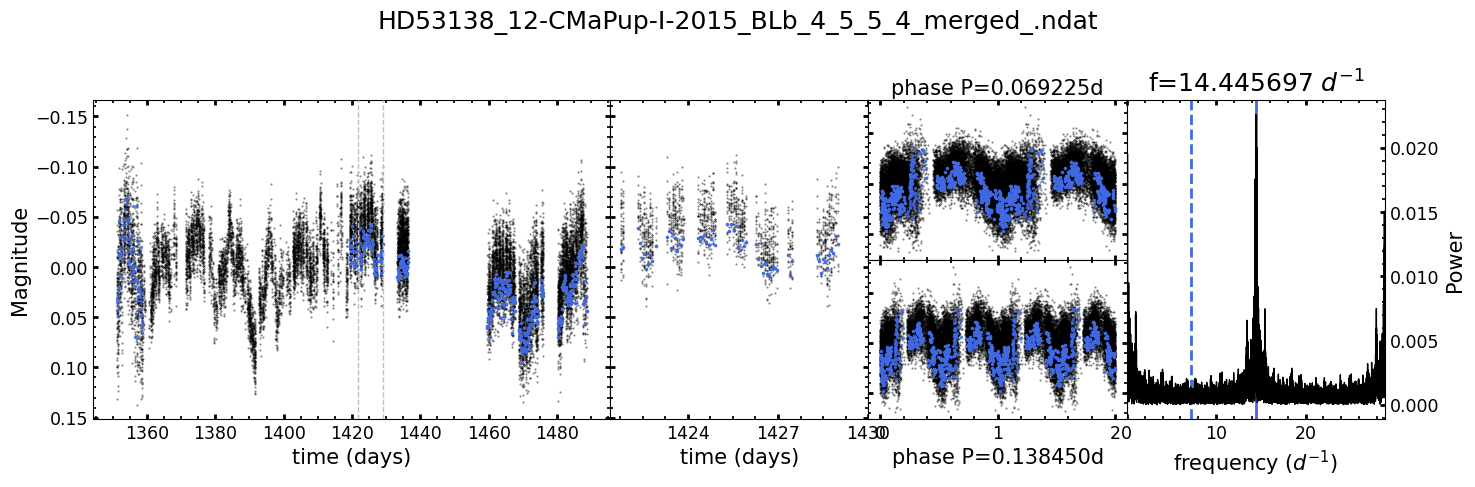

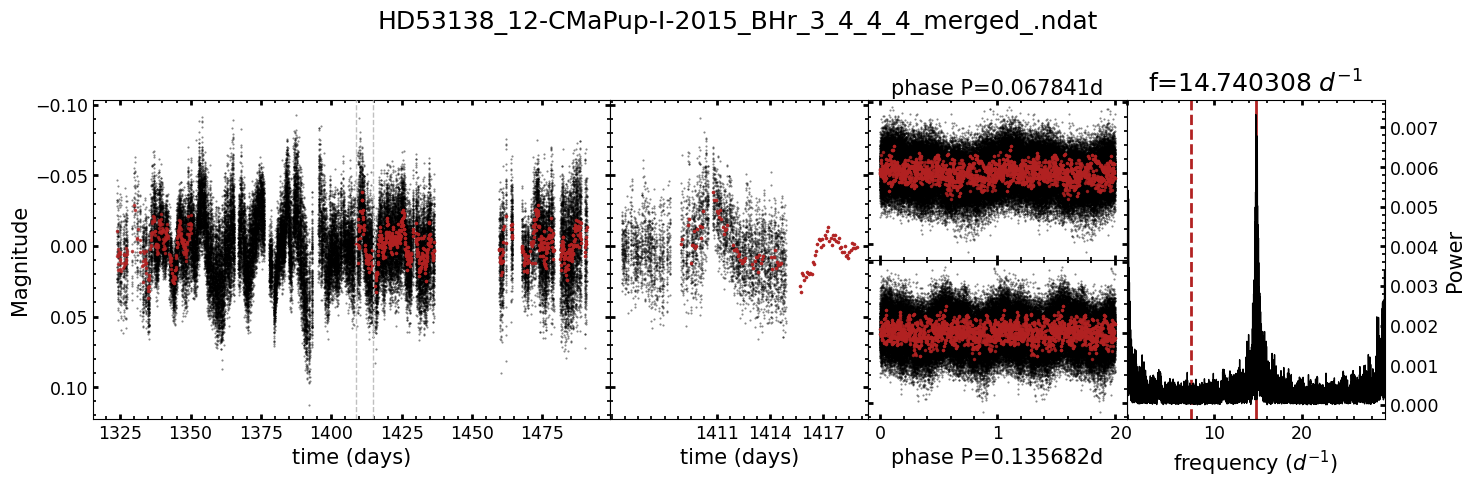

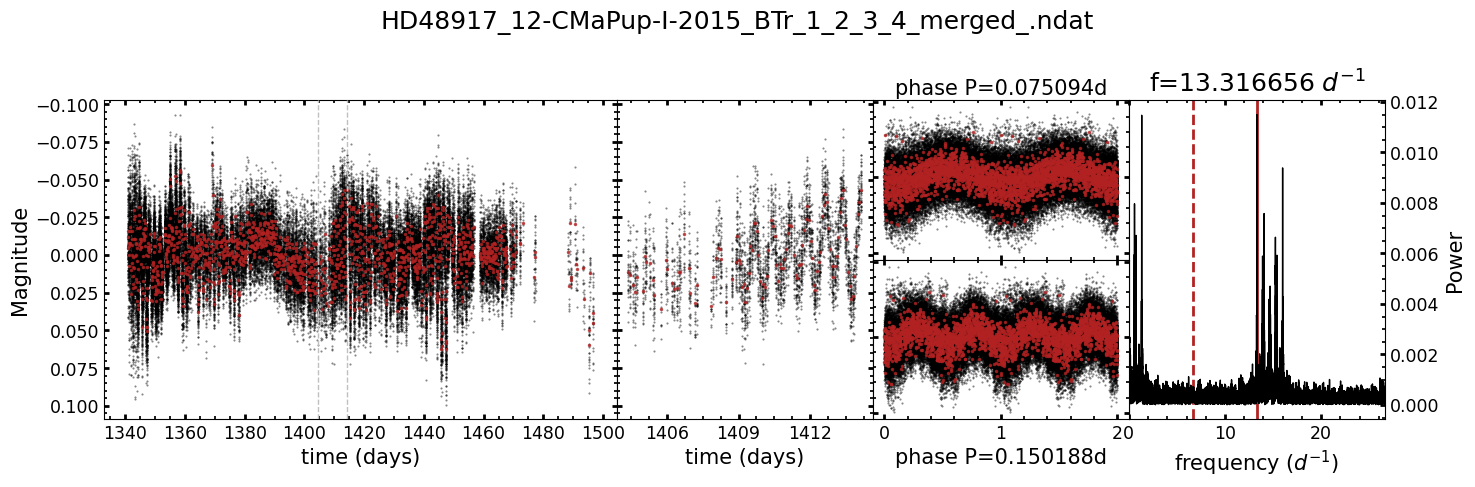

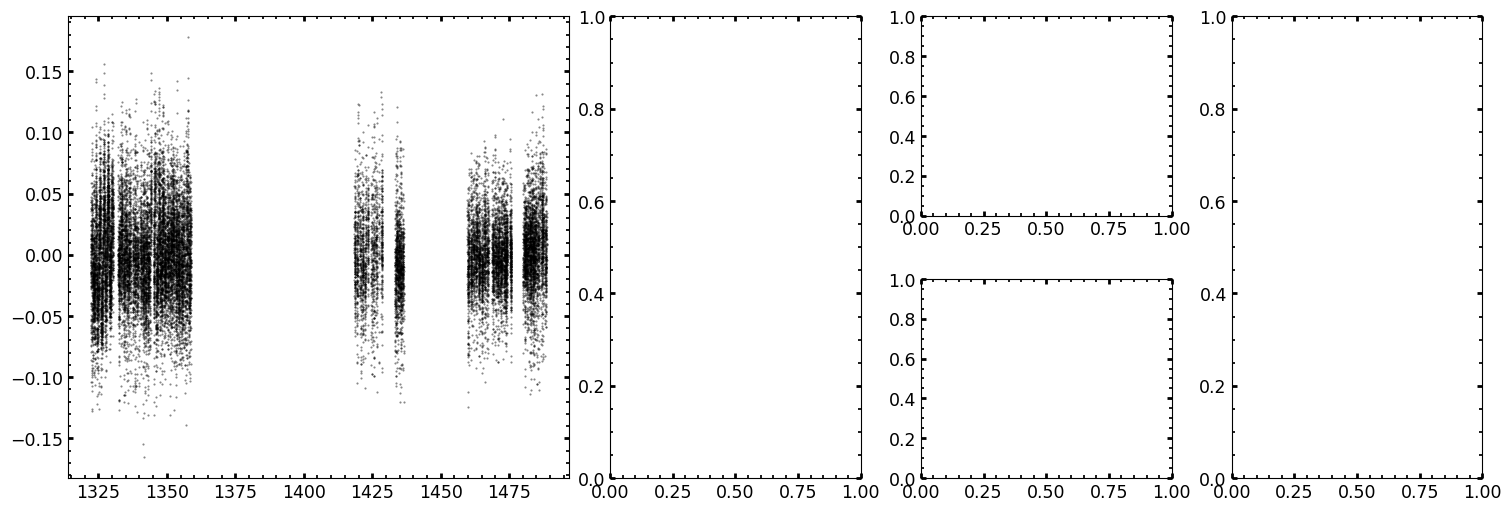

In [8]:
num = 0
# for field in [9, 10, 11, 12, 14]:
for field in [12]:
    stars = load(field)
    num += len(stars)
    print("Numbers of stars done:", num)
    for star in stars:
        result_path = star.results[0]
        for dataset in star.get_all_data_sets(result_path):
            if dataset.combined:
                print(dataset._path)
                create_plot(dataset._path)
            
#     if result_path == default_result_entry:
#             used_path = star._path
#     else:
#         used_path = os.path.join(star._path,result_path)
#     objects = {}

#     counter = 1

#     for root,dir,files in os.walk(used_path):
#         files = [i for i in files if i.endswith('ndat')]
#         for file in files:
#             objects[counter] = (file,os.path.join(root,file))
#             counter +=1
    
#     keys = objects.keys()
#     paths = [objects[key][1] for key in keys]
    
#     print(paths)
#     for p in paths:
#         if '_ME' in p:
#             create_plot(p)
    

        
        
        
#         path =  objects[key][1]
#         data = Data(path,None)
#         print(data)
#         data.scatter()
#     print(objects.keys())